In [ ]:
import numpy as np
import pandas as pd
from mat_balance import MaterialBalance
from solver import SolverMatbal

df = pd.read_excel("../matbal/data_6wells.xlsx")
WGP6 = df.pivot_table('WGP',index='dates',columns='well_name').to_numpy()
RGIPG6 = df.pivot_table('RGIPG',index='dates',columns='well_name').to_numpy()
RPR6 = df.pivot_table('RPR',index='dates',columns='well_name').to_numpy()
bnds = [
        1, #[0, 1]  0
        1, #[0, 2]  1
        1, #[0, 3]  2
        1, #[0, 4]  3
        1, #[0, 5]  4
        0, #[1, 2]  5
        1, #[1, 3]  6
        0, #[1, 4]  7
        0, #[1, 5]  8
        1, #[2, 3]  9
        0, #[2, 4]  10
        1, #[2, 5]  11
        0, #[3, 4]  12
        0, #[3, 5]  13
        1, #[4, 5]] 14
        ]
voronoi_regs=np.zeros((6, 6))
voronoi_regs[np.triu_indices_from(voronoi_regs, 1)]=bnds
voronoi_regs=voronoi_regs+voronoi_regs.T

mb6 = MaterialBalance(WGP6, RGIPG6[0], RPR6[0])
solver6 = SolverMatbal(mb6, RPR6, voronoi_regs)
opt = solver6.opt_mininize()

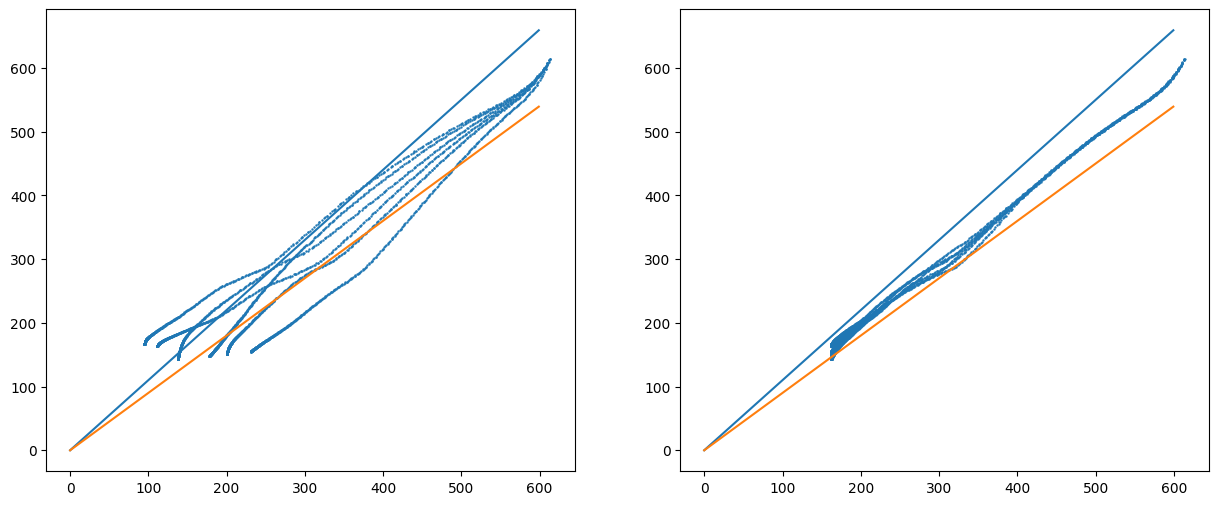

In [ ]:
import matplotlib.pyplot as plt
res_start = mb6.calc(np.ones((6, 6)))

j_2d = solver6.get_j2d(opt.x)
res_opt = mb6.calc(j_2d)

fact_model_start = np.array([np.array([r.x for r in res_start]).reshape(-1), solver6.rpr.reshape(-1)])
fact_model_opt = np.array([np.array([r.x for r in res_opt]).reshape(-1), solver6.rpr.reshape(-1)])

fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
axs[0].scatter(fact_model_start[0], fact_model_start[1], s=0.5)
axs[1].scatter(fact_model_opt[0], fact_model_opt[1],  s=0.5)
axs[0].plot(np.arange(600),np.arange(600)*1.1)
axs[0].plot(np.arange(600),np.arange(600)*.9)
axs[1].plot(np.arange(600),np.arange(600)*1.1)
axs[1].plot(np.arange(600),np.arange(600)*.9)